# INFO 7374 Machine Learning in Finance
# Garch Model 

## Installing the datareader
### Remote Data Access

Functions from pandas_datareader.data and pandas_datareader.wb extract data from various Internet sources into a pandas DataFrame.

In [4]:
#!pip install pandas_datareader

## Importing all the requried libraries 

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from datetime import datetime
import datetime
import math
import scipy.stats as ss
import seaborn as sns; sns.set(color_codes=True)
from math import sqrt
from sklearn.metrics import mean_squared_error

import scipy.optimize as opt

# extract data from various Internet sources into a pandas DataFrame
import pandas_datareader as web

In [74]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2019, 12, 31)
df_amzn = web.DataReader('AMZN', 'yahoo', start, end) 
df_shop = web.DataReader('SHOP', 'yahoo', start, end) 
shop=df_shop
amzn= df_amzn
amzn=amzn.reset_index()
amzn['Date'] = pd.to_datetime(amzn['Date'])
# corresponding csv file is saved in an ouput directory 
#df_amzn.to_csv('data/data.csv')
amzn 

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-01-02,399.359985,394.019989,398.799988,397.970001,2137800,397.970001
1,2014-01-03,402.709991,396.220001,398.290009,396.440002,2210200,396.440002
2,2014-01-06,397.000000,388.420013,395.850006,393.630005,3170600,393.630005
3,2014-01-07,398.470001,394.290009,395.040009,398.029999,1916000,398.029999
4,2014-01-08,403.000000,396.040009,398.470001,401.920013,2316500,401.920013
...,...,...,...,...,...,...,...
1505,2019-12-24,1795.569946,1787.579956,1793.810059,1789.209961,881300,1789.209961
1506,2019-12-26,1870.459961,1799.500000,1801.010010,1868.770020,6005400,1868.770020
1507,2019-12-27,1901.400024,1866.010010,1882.920044,1869.800049,6186600,1869.800049
1508,2019-12-30,1884.000000,1840.619995,1874.000000,1846.890015,3674700,1846.890015


In [4]:
amzn.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [5]:
amzn.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03,1510.000000
mean,993.781477,974.209524,984.870748,984.458550,4.172356e+06,984.458550
std,571.857494,560.842867,567.071205,566.579233,2.291493e+06,566.579233
min,290.420013,284.000000,284.399994,286.950012,8.813000e+05,286.950012
25%,444.787498,435.782494,439.577507,439.567513,2.720875e+06,439.567513
50%,821.825012,813.500000,819.200012,818.119995,3.560800e+06,818.119995
75%,1623.350037,1590.832489,1604.000000,1603.029968,4.808650e+06,1603.029968
max,2050.500000,2013.000000,2038.109985,2039.510010,2.385610e+07,2039.510010


In [75]:
shop.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1163.000000,1163.000000,1163.000000,1163.000000,1.163000e+03,1163.000000
mean,123.681519,118.708127,121.139244,121.357317,1.479295e+06,121.357317
std,101.777475,97.798386,99.719520,99.945112,1.466998e+06,99.945112
min,17.000000,17.000000,17.000000,17.000000,0.000000e+00,17.000000
25%,37.710001,35.089998,36.335001,36.244999,6.791000e+05,36.244999
50%,99.970001,96.250000,98.000000,98.610001,1.205000e+06,98.610001
75%,158.862503,152.555000,155.724998,154.889999,1.824700e+06,154.889999
max,416.600006,403.109985,411.510010,408.750000,2.089590e+07,408.750000


In Stock trading, the **high**, **low** refers to the maximum and the minimum prices in a given time period. **Open** and **Close** are thhighLowOpenClosee prices at which a stock began and ended trading in the same period. **Volume** is the total amount of trading activity. Adjusted values factor in corporate actions such as dividends, stock splits, and new share issuance.

In [57]:
amzn['Typical_Price'] = amzn[['High','Low','Close']].mean(axis=1)
amzn['lrets'] = (np.log(amzn.Close) - np.log(amzn.Close.shift(1))) * 100.
amzn.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Typical_Price,lrets
0,2014-01-02,399.359985,394.019989,398.799988,397.970001,2137800,397.970001,397.116659,NaN
1,2014-01-03,402.709991,396.220001,398.290009,396.440002,2210200,396.440002,398.456665,-0.385192
2,2014-01-06,397.000000,388.420013,395.850006,393.630005,3170600,393.630005,393.016673,-0.711332
3,2014-01-07,398.470001,394.290009,395.040009,398.029999,1916000,398.029999,396.930003,1.111598
4,2014-01-08,403.000000,396.040009,398.470001,401.920013,2316500,401.920013,400.320007,0.972572


In [8]:

shop['Typical_Price'] = shop[['High','Low','Close']].mean(axis=1)
shop['lrets'] = (np.log(shop.Close) - np.log(shop.Close.shift(1))) * 100.
shop.head()

,High,Low,Open,Close,Volume,Adj Close,Typical_Price,lrets
Date,,,,,,,,
2014-01-02,399.359985,394.019989,398.799988,397.970001,2137800,397.970001,397.116659,NaN
2014-01-03,402.709991,396.220001,398.290009,396.440002,2210200,396.440002,398.456665,-0.385192
2014-01-06,397.000000,388.420013,395.850006,393.630005,3170600,393.630005,393.016673,-0.711332
2014-01-07,398.470001,394.290009,395.040009,398.029999,1916000,398.029999,396.930003,1.111598
2014-01-08,403.000000,396.040009,398.470001,401.920013,2316500,401.920013,400.320007,0.972572


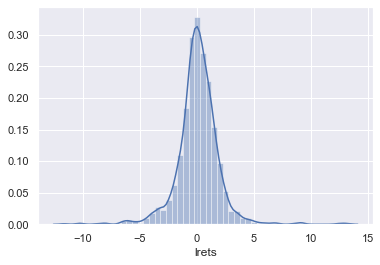

In [9]:
sns.distplot(amzn['lrets'].dropna())

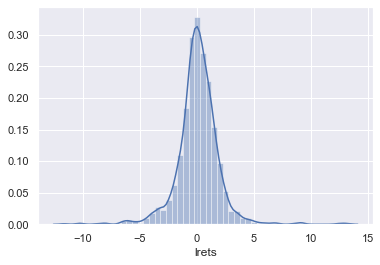

In [10]:
sns.distplot(shop['lrets'].dropna())

In [58]:
def GARCH(Y):
    "Initialize Params:"
    mu = param0[0]
    omega = param0[1]
    alpha = param0[2]
    beta = param0[3]
    T = Y.shape[0]
    GARCH_Dens = np.zeros(T) 
    sigma2 = np.zeros(T)   
    F = np.zeros(T)   
    v = np.zeros(T)   
    for t in range(1,T):
        sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]); 
        F[t] = Y[t] - mu-np.sqrt(sigma2[t])*np.random.normal(0,1,1)
        v[t] = sigma2[t]
        GARCH_Dens[t] = (1/2)*np.log(2*np.pi)+(1/2)*np.log(v[t])+(1/2)*(F[t]/v[t])     
        Likelihood = np.sum(GARCH_Dens[1:-1])  
    return Likelihood

In [59]:
def GARCH_Prod(params, Y0, T):
    mu = params[0]
    omega = params[1]
    alpha = params[2]
    beta = params[3]
    Y = np.zeros(T)  
    sigma2 = np.zeros(T)
    Y[0] = Y0
    sigma2[0] = 0.0001
    for t in range(1,T):
        sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]); 
        Y[t] = mu+np.sqrt(sigma2[t])*np.random.normal(0,1,1)    
    return Y

C:\Users\akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: OptimizeWarning: Unknown solver options: xtol
  """


         Current function value: 2.165856
         Iterations: 2
         Function evaluations: 203
         Gradient evaluations: 31


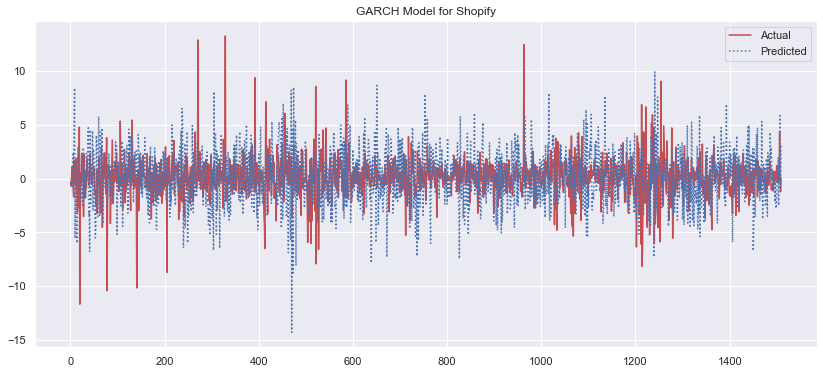

In [42]:
Y = shop['lrets'].dropna()
T=len(Y)

param0=np.array([0.124,1.88,0.2,0.5])
param_star=opt.minimize(GARCH,param0, method ='BFGS' , options = {'xtol' : 1e-8, 'disp' : True})

Y_GARCH=GARCH_Prod(param_star.x,Y[1],T)
timevec=np.linspace(1,T,T)

fig= plt.figure(figsize=(14,6))
plt.plot(timevec, Y,'r-', label='Actual')
plt.plot(timevec, Y_GARCH,'b:', label='Predicted')

plt.legend(loc='upper right')
plt.title("GARCH Model for Shopify")
plt.show()

In [44]:
dif_shopify = pd.DataFrame({'Actual':list(Y),
                     'Predicted':list(Y_GARCH)})
dif_shopify

,Actual,Predicted
0,-0.385192,-0.385192
1,-0.711332,1.674328
2,1.111598,0.709845
3,0.972572,2.315862
4,-0.226671,-0.435661
...,...,...
1504,-0.211603,-2.356116
1505,4.350631,-0.761325
1506,0.055103,-0.848188
1507,-1.232835,0.361477


In [46]:
rms_shopify = sqrt(mean_squared_error(dif['Actual'],dif['Predicted']))
rms_shopify

3.2061166344295797

C:\Users\akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: OptimizeWarning: Unknown solver options: xtol
  


         Current function value: 2.466892
         Iterations: 3
         Function evaluations: 236
         Gradient evaluations: 36


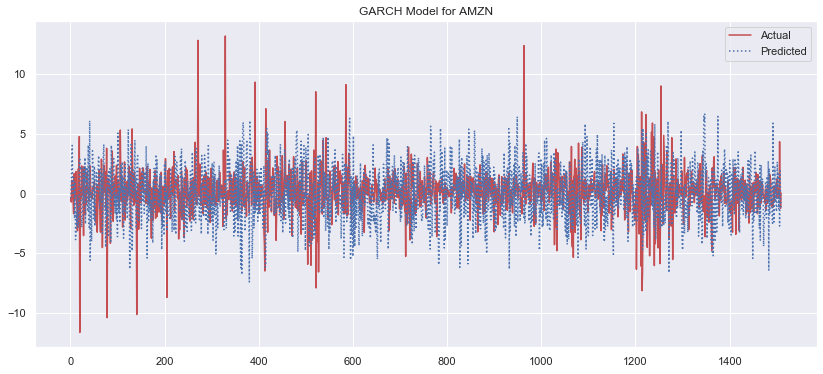

In [70]:
Y = amzn['lrets'].dropna()
T=len(Y)

#Y=np.random.normal(mu,sig,T)
param0=np.array([0.124,1.88,0.2,0.5])
param_star=opt.minimize(GARCH,param0, method ='BFGS' , options = {'xtol' : 1e-8, 'disp' : True})
Y_GARCH=GARCH_Prod(param_star.x,Y[1],T)
timevec=np.linspace(1,T,T)

fig= plt.figure(figsize=(14,6))
plt.plot(timevec, Y,'r-', label='Actual')
plt.plot(timevec, Y_GARCH,'b:', label='Predicted')

plt.legend(loc='upper right')
plt.title("GARCH Model for AMZN")
plt.show()

In [71]:
dif = pd.DataFrame({'Actual':list(Y),
                     'Predicted':list(Y_GARCH)})

In [62]:
dif

,Actual,Predicted
0,-0.385192,-0.385192
1,-0.711332,0.375264
2,1.111598,1.255604
3,0.972572,-0.364909
4,-0.226671,-0.736763
...,...,...
1504,-0.211603,2.986290
1505,4.350631,1.160428
1506,0.055103,2.185458
1507,-1.232835,2.664610


In [63]:
dif.head()

,Actual,Predicted
0,-0.385192,-0.385192
1,-0.711332,0.375264
2,1.111598,1.255604
3,0.972572,-0.364909
4,-0.226671,-0.736763


In [64]:
rms = sqrt(mean_squared_error(dif['Actual'],dif['Predicted']))
rms

3.092914546632051

In [65]:
y_pred = [] * 1000

for i in range(len(dif)+1):
    if i == 0:
        y_pred.append(636.989990)
    else:
        y_pred.append(math.exp(dif['Predicted'][i-1]/100) * y_pred[i-1])

In [66]:

Predicted = pd.DataFrame({'Actual_Close_Price':amzn.Close,
                     'Predicted_Close_Price':list(y_pred),
                         'Date': amzn.Date})
Predicted.set_index('Date')

,Actual_Close_Price,Predicted_Close_Price
Date,,
2014-01-02,397.970001,636.989990
2014-01-03,396.440002,634.541077
2014-01-06,393.630005,636.926758
2014-01-07,398.029999,644.974453
2014-01-08,401.920013,642.625173
...,...,...
2019-12-24,1789.209961,19664.726916
2019-12-26,1868.770020,19894.250993
2019-12-27,1869.800049,20333.817170



### Checking Return Volatility with Actual and Predicted Values¶

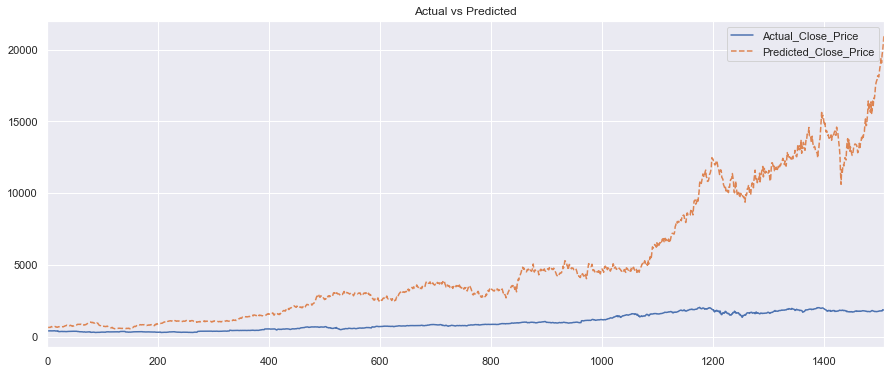

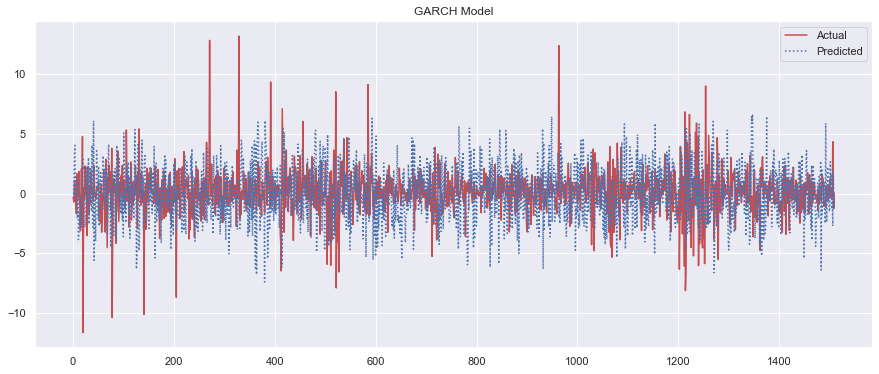

In [72]:
Predicted[['Actual_Close_Price','Predicted_Close_Price']].loc[0:].plot(figsize=(15,6), style=['-','--'], 
                                                                    title = 'Actual vs Predicted')
fig= plt.figure(figsize=(15,6))
plt.plot(timevec, Y,'r-', label='Actual')
plt.plot(timevec, Y_GARCH,'b:', label='Predicted')
plt.legend(loc='upper right')
plt.title("GARCH Model")
plt.show()

In [69]:
Predicted.head()


,Actual_Close_Price,Predicted_Close_Price,Date
0,397.970001,636.989990,2014-01-02
1,396.440002,634.541077,2014-01-03
2,393.630005,636.926758,2014-01-06
3,398.029999,644.974453,2014-01-07
4,401.920013,642.625173,2014-01-08


## Trading Strategy
#### 1.Buy if we have next days predicted_value greater than todays close value and hold if already bought
#### 2.Sell if we have next days predicted_value lesser than todays close value and dont buy until rule 1

In [21]:
signal = 0
amount = 10000
Amount = []
balance = 0
action = []
portfolio = 0
Portfolio = []
stocks = 0
Stocks = []


for i in range(len(Predicted)-1):
    if Predicted['Predicted_Close_Price'][i+1] > Predicted['Actual_Close_Price'][i]:
        if signal == 0:
            action.append('Buy')
            stocks = int(amount / Predicted['Actual_Close_Price'][i])
            balance = int(amount % Predicted['Actual_Close_Price'][i])
            portfolio = stocks * Predicted['Actual_Close_Price'][i]
            signal = 1
            amount = portfolio + balance
            print('Stock:',Predicted['Actual_Close_Price'][i] ,'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
        else:
            action.append('Bought--Holding')
            portfolio = stocks * Predicted['Actual_Close_Price'][i]
            amount = portfolio + balance
            print('Stock:',Predicted['Actual_Close_Price'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
            
    elif Predicted['Predicted_Close_Price'][i+1] < Predicted['Actual_Close_Price'][i]:
        if signal == 1:
            action.append('Sell')
            portfolio = stocks * Predicted['Actual_Close_Price'][i]
            
            signal = 0
            stocks = 0
            amount = balance + portfolio
            portfolio = 0
            balance = 0
            print('Stock:',Predicted['Actual_Close_Price'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
        else:
            action.append('Price-Prediction-Already-Lower')
            print('Stock:',Predicted['Actual_Close_Price'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
            
    print('\n')

Stock: 397.9700012207031 Action: Buy Portfolio: 9949.25 Stocks: 25 Balance_init: 50 total($) 9999.25


Stock: 396.44000244140625 Action: Bought--Holding Portfolio: 9911.0 Stocks: 25 Balance_init: 50 total($) 9961.0


Stock: 393.6300048828125 Action: Bought--Holding Portfolio: 9840.75 Stocks: 25 Balance_init: 50 total($) 9890.75


Stock: 398.0299987792969 Action: Bought--Holding Portfolio: 9950.75 Stocks: 25 Balance_init: 50 total($) 10000.75


Stock: 401.9200134277344 Action: Bought--Holding Portfolio: 10048.0 Stocks: 25 Balance_init: 50 total($) 10098.0


Stock: 401.010009765625 Action: Bought--Holding Portfolio: 10025.25 Stocks: 25 Balance_init: 50 total($) 10075.25


Stock: 397.6600036621094 Action: Bought--Holding Portfolio: 9941.5 Stocks: 25 Balance_init: 50 total($) 9991.5


Stock: 390.9800109863281 Action: Bought--Holding Portfolio: 9774.5 Stocks: 25 Balance_init: 50 total($) 9824.5


Stock: 397.5400085449219 Action: Bought--Holding Portfolio: 9938.5 Stocks: 25 Balance_init: 50 

### Created a dataframe with all the information


In [22]:
Strategy_Result = pd.DataFrame({'Actual_Close_Price':amzn.Close[1:],
                                 'Predicted_Close_Price':list(y_pred[1:]),
                                 'Date': amzn.Date[1:],
                                 'Action':  action,
                                 'Stocks': Stocks,
                                 'Portfolio($)': Portfolio,
                                 'Amount($)':Amount
                                    })

Strategy_Result.head()

,Actual_Close_Price,Predicted_Close_Price,Date,Action,Stocks,Portfolio($),Amount($)
1,396.440002,634.541077,2014-01-03,Buy,25,9949.25003,9999.0
2,393.630005,627.309113,2014-01-06,Bought--Holding,25,9911.00006,9961.0
3,398.029999,616.501422,2014-01-07,Bought--Holding,25,9840.75012,9891.0
4,401.920013,638.204967,2014-01-08,Bought--Holding,25,9950.74997,10001.0
5,401.010010,630.084936,2014-01-09,Bought--Holding,25,10048.00034,10098.0


### Profit Made with this Strategy


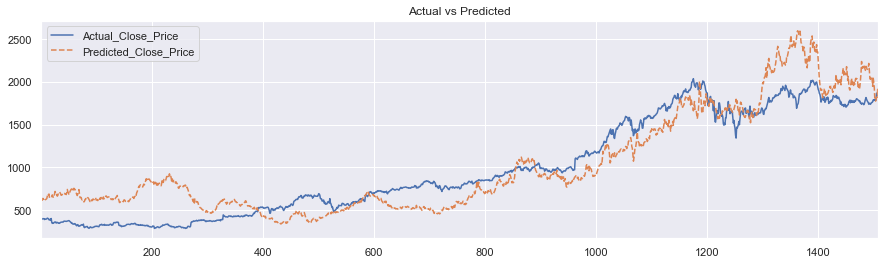

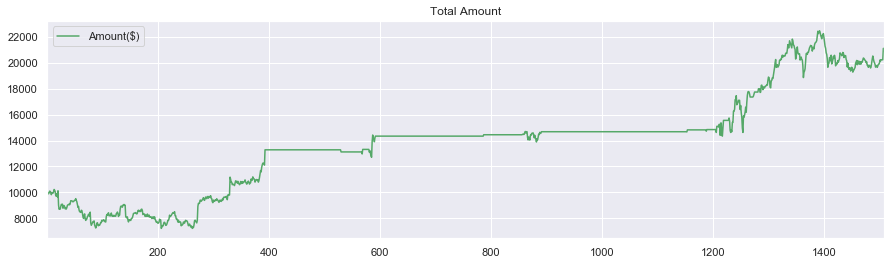

In [23]:
Strategy_Result[['Actual_Close_Price','Predicted_Close_Price']].loc[0:].plot(figsize=(15,4), 
                                                                             style=['-','--'], 
                                                                             title = 'Actual vs Predicted')


Strategy_Result[['Amount($)']].loc[0:].plot(figsize=(15,4), 
                                            style=['-g'], 
                                            title = 'Total Amount')

In [24]:
Profit = (Amount[-1])/10000
print('Initial_Investment : 10000$')
print('Final Amount:',Amount[-1],'$')      
print ('Profit_Percent:',Profit*100,'%')

Initial_Investment : 10000$
Final Amount: 20850.0 $
Profit_Percent: 208.5 %


In [25]:
rms = sqrt(mean_squared_error(Strategy_Result['Actual_Close_Price'], Strategy_Result['Predicted_Close_Price']))
rms

263.76126994636775

### Sharp Ratio¶


In [26]:

Strategy_Result['Returns'] = Strategy_Result['Amount($)'].pct_change()

In [27]:
mean_returns = Strategy_Result['Returns'].mean()
sd = Strategy_Result['Returns'].std()
print(mean_returns,sd)
Market_RF = 0.0464


Sharpe_Ratio = np.sqrt(877)*(mean_returns)/sd
Sharpe_Ratio

0.0005781957555903046 0.013532928508478592


1.2652691188213798

In [28]:
rms = sqrt(mean_squared_error(Strategy_Result['Actual_Close_Price'], Strategy_Result['Predicted_Close_Price']))


In [29]:
sqrt(rms)


16.240728738156047

# Citation

1. https://seaborn.pydata.org/generated/seaborn.kdeplot.html
2. https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
3. google Images 